## 1. Import Library and Packages

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import re

In [86]:
df_fake=pd.read_csv("../data/Fake.csv")
df_real = pd.read_csv("../data/True.csv")

## Basic Info

In [59]:
df_fake.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


In [60]:
df_real.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [61]:
df_fake["subject"].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [62]:
df_real["subject"].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [63]:
df_fake.shape

(23481, 4)

In [64]:
df_real.shape

(21417, 4)

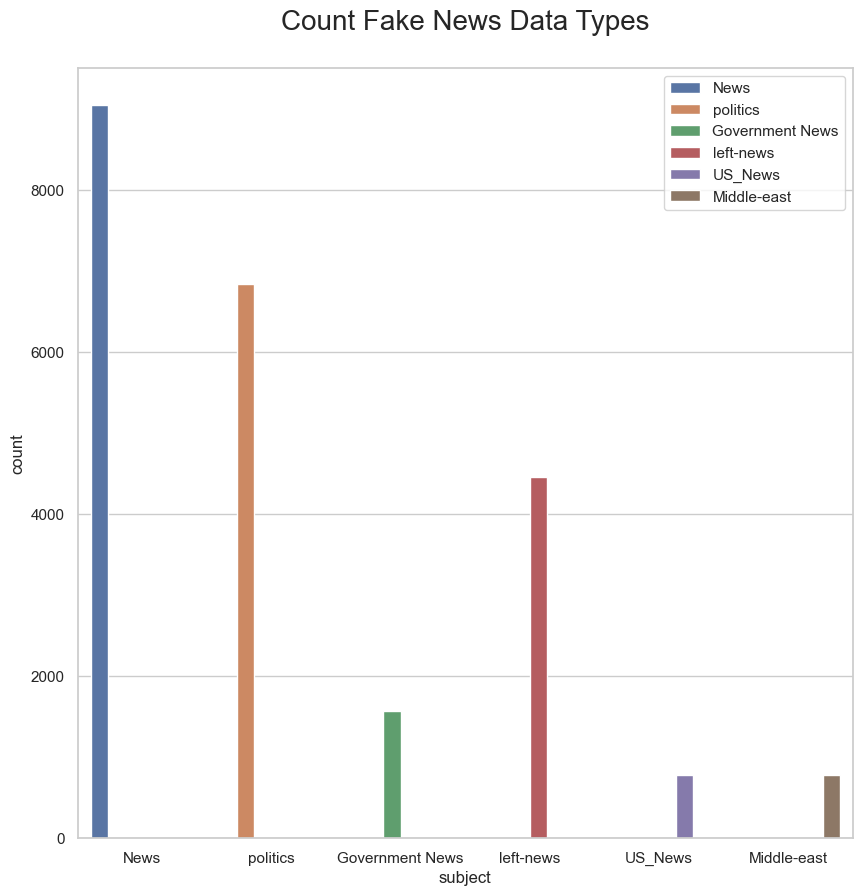

In [65]:
plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.countplot(x="subject",data=df_fake,hue="subject")
plt.title("Count Fake News Data Types\n",fontsize=20)
plt.legend(loc="best")
plt.show()

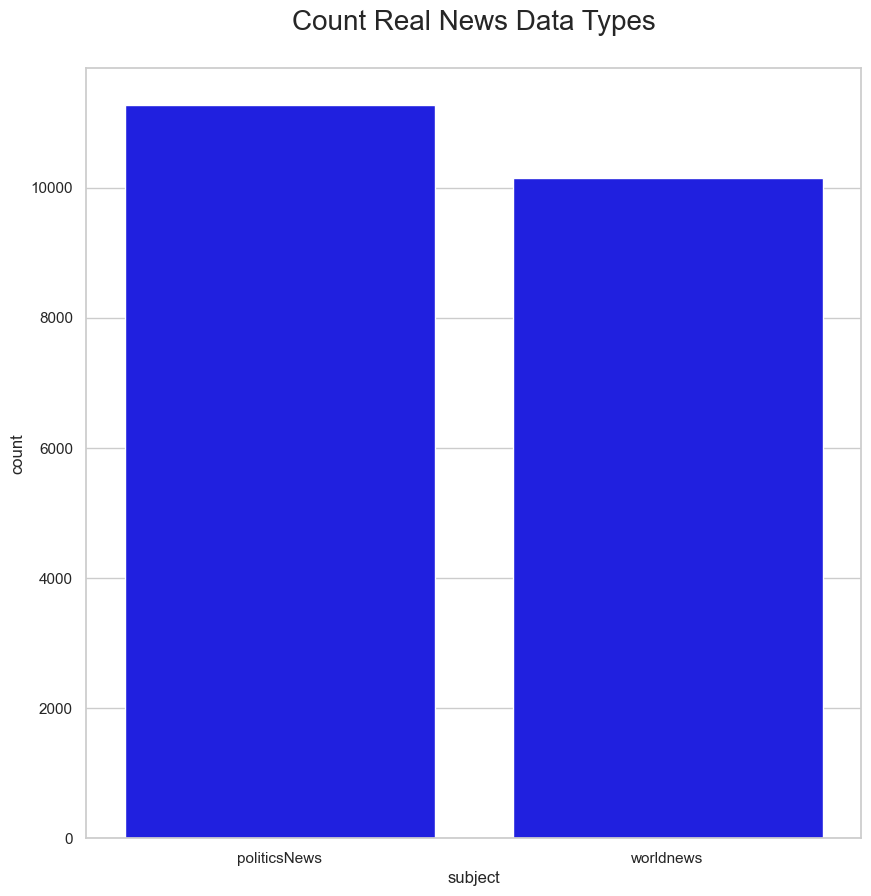

In [66]:
plt.figure(figsize=(10,10))
sns.countplot(x=df_real["subject"],color='blue')
plt.title("Count Real News Data Types\n",fontsize=20)
plt.show()

## Label and combine dataset

In [87]:
df_fake['label'] = 1
df_real['label'] = 0
df=pd.concat([df_real,df_fake],ignore_index=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


#### Label Distribution

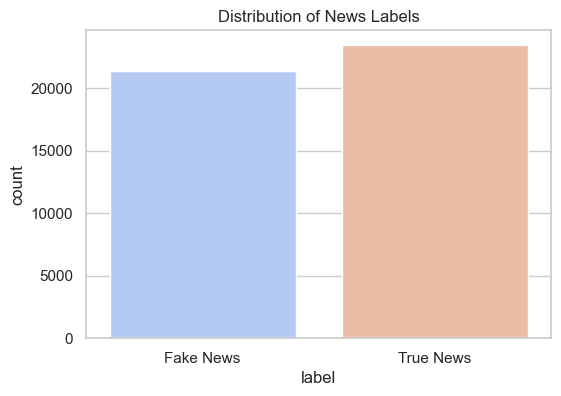

In [69]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["label"], palette="coolwarm")
plt.xticks([0, 1], ["Fake News", "True News"])
plt.title("Distribution of News Labels")
plt.show()

#### Word Count Distribution

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075:

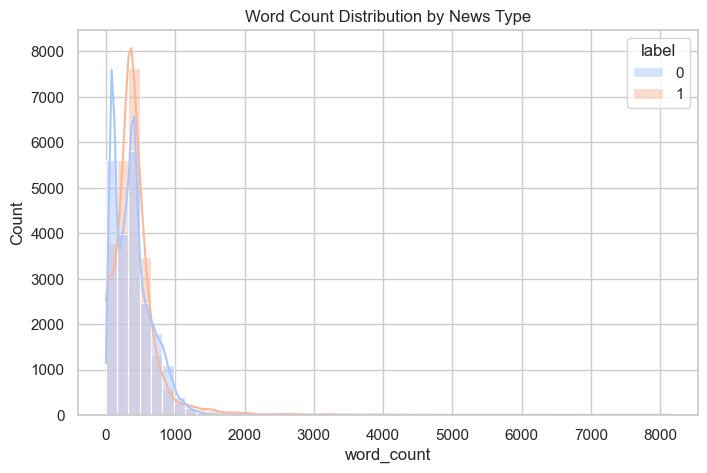

In [70]:
df["word_count"] = df["text"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8, 5))
sns.histplot(df, x="word_count", hue="label", bins=50, kde=True, palette="coolwarm")
plt.title("Word Count Distribution by News Type")
plt.show()

#### Common word in fake news

In [71]:
# fake_text = " ".join(df[df["label"] == 0]["text"].dropna())
# wordcloud_fake = WordCloud(width=800, height=400, background_color="black").generate(fake_text)
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud_fake, interpolation="bilinear")
# plt.axis("off")
# plt.title("Most Common Words in Fake News")
# plt.show()

#### Most common word in True News

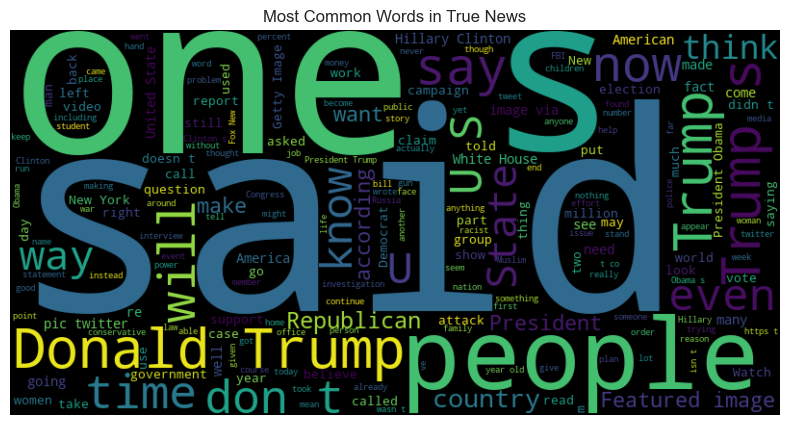

In [72]:
true_text = " ".join(df[df["label"] == 1]["text"].dropna())
wordcloud_true = WordCloud(width=800, height=400, background_color="black").generate(true_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_true, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in True News")
plt.show()

## End of EDA

## Feature Engineering

In [88]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_text'] = df['title'] + " " + df['text']
df['clean_text'] = df['clean_text'].apply(clean_text)
df

,title,text,subject,date,label,clean_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,as us budget fight looms republicans flip thei...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,us military to accept transgender recruits on ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,senior us republican senator let mr mueller do...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,fbi russia probe helped by australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,trump wants postal service to charge much more...
...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1,mcpain john mccain furious that iran treated u...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1,justice yahoo settles email privacy classactio...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1,sunnistan us and allied safe zone plan to take...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1,how to blow million al jazeera america finally...


In [89]:
# Calculate word counts per claim
word_counts = df['clean_text'].astype(str).apply(lambda x: len(x.split()))

# Get stats
average_words = word_counts.mean()
max_words = word_counts.max()
min_words = word_counts.min()

print(f"Average words per claim: {average_words:.2f}")
print(f"Max words in a claim: {max_words}")
print(f"Min words in a claim: {min_words}")


Average words per claim: 411.91
Max words in a claim: 8057
Min words in a claim: 0


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [84]:
# Use a term frequency inverse document frequency vectorizer to convert textual data into numerical features for ML model training
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range = (1, 3))
# vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range = (1, 2))
# vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# vectorize 'text' data
X = vectorizer.fit_transform(df["clean_text"].fillna(""))
y = df["label"]

In [76]:
# Features used
feature_names = vectorizer.get_feature_names_out()
print("Sample Features Extracted:", feature_names[:20])

Sample Features Extracted: ['abandon' 'abandoned' 'abbas' 'abc' 'abdullah' 'abe' 'abedin' 'ability'
 'able' 'abortion' 'abortions' 'abroad' 'absence' 'absolute' 'absolutely'
 'absurd' 'abu' 'abuse' 'abused' 'abuses']


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
model = MultinomialNB()
# model = MultinomialNB(alpha = 0.1)
# model = MultinomialNB(alpha = 0.3)
model.fit(X_train, y_train)

MultinomialNB()

In [79]:
y_pred = model.predict(X_test)

In [80]:
# Evaluate the model

accuracy = round(accuracy_score(y_test, y_pred), 5)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred, digits=5))

print("EDA and Fake News Classification completed successfully!")

Accuracy: 0.93886
Classification Report:
              precision    recall  f1-score   support

           0    0.93873   0.93418   0.93645      4330
           1    0.93899   0.94323   0.94110      4650

    accuracy                        0.93886      8980
   macro avg    0.93886   0.93870   0.93878      8980
weighted avg    0.93886   0.93886   0.93886      8980

EDA and Fake News Classification completed successfully!


In [81]:
y_proba = model.predict_proba(X_test)[:, 1]
roc_auc = round(roc_auc_score(y_test, y_proba), 5)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.98331


<Figure size 640x480 with 0 Axes>

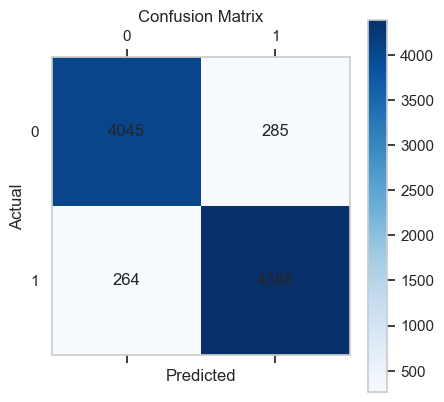

In [82]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
plt.matshow(conf_matrix, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.grid(False)
for (i, j), value in np.ndenumerate(conf_matrix):
    plt.text(j, i, f'{value}', ha='center', va='center')
plt.show()

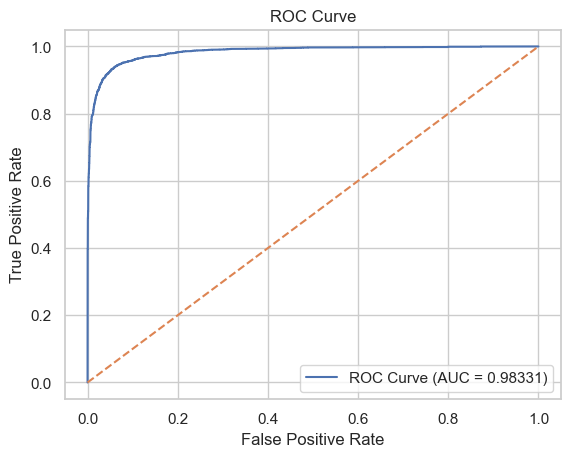

In [83]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()